In [9]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [11]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
print(PrVP)

0.08683729433272395


In [26]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.repeat(1,1000)
likelihood = stats.binom.pmf(6,9,p_grid)
posterior = likelihood*prior
posterior = posterior/sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

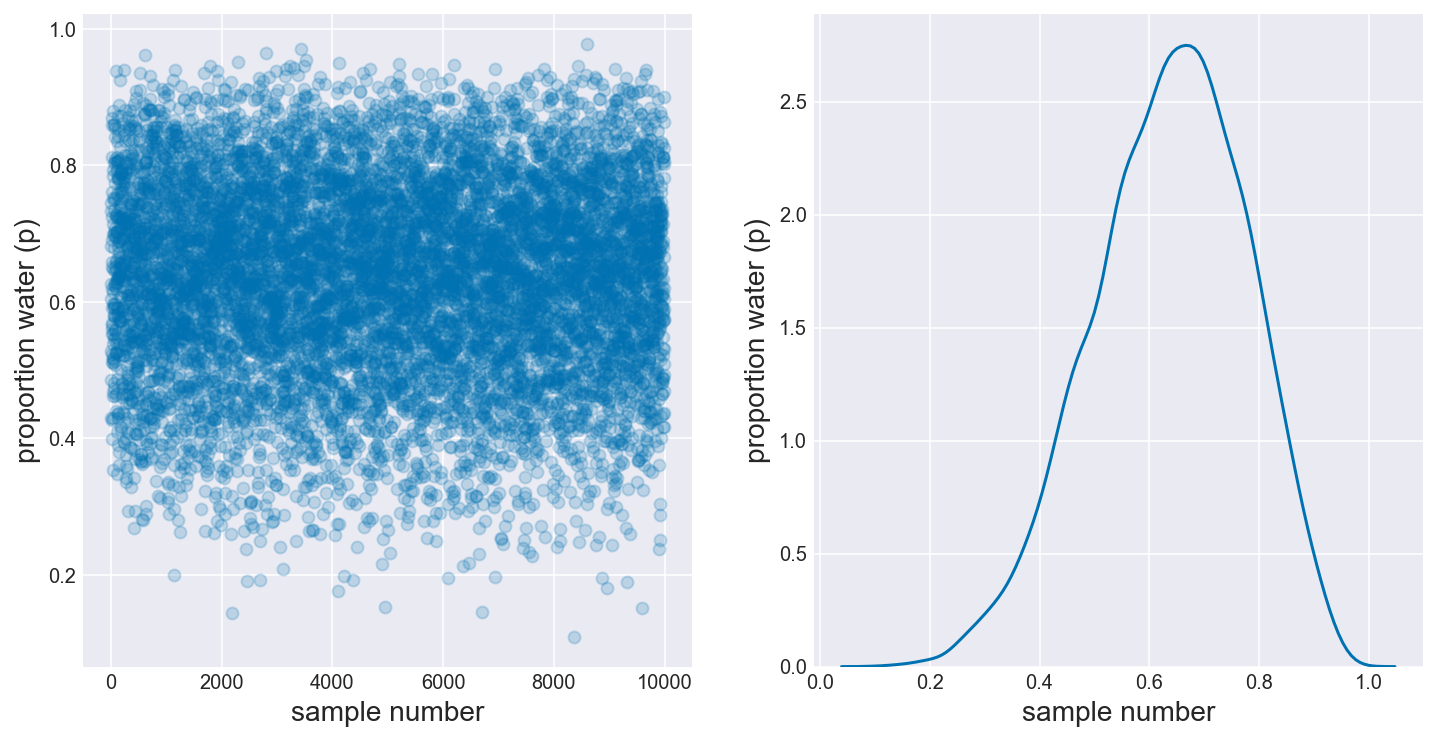

In [27]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('sample number', fontsize=14)
ax1.set_ylabel('proportion water (p)', fontsize=14);

In [28]:
sum(posterior[ p_grid < 0.5 ])

0.17187458902022879

In [29]:
sum(samples <0.5)/1e4

0.1729